In [1]:
from transpile_benchy.interfaces.qasm_interface import QASMBench, RedQueen
from transpile_benchy.interfaces.abc_interface import MQTBench
from transpile_benchy.metrics.depth_metric import DepthMetric
from qiskit.circuit.library import iSwapGate
from qiskit.transpiler import CouplingMap
from mirror_gates.pass_managers import SabreMS, QiskitLevel3
from mirror_gates.utilities import SubsMetric

In [2]:
coupling_map = CouplingMap.from_line(8)
filter_list = ["fredkin", "toffoli", "adder_n4"]
qasm_bench_m = QASMBench(size="small", filter_list=filter_list)
filter_list = ["\\bqaoa", "qft", "shor", "dj", "ae", "qgan"]
# filter_list = ["None"]
mqt_bench = MQTBench(num_qubits=8, filter_list=filter_list)

In [3]:
# coupling_map = CouplingMap.from_grid(6,6)
# filter_list = None
# qasm_bench_m = QASMBench(size="medium", filter_list=filter_list)
# filter_list = ["\\bqaoa", "qft", "shor", "dj", "ae", "qgan", "qpe"]
# filter_list = ["None"]
# mqt_bench = MQTBench(num_qubits=8, filter_list=filter_list)

In [4]:
# from qiskit.circuit.library import CXGate, iSwapGate
# from qiskit.extensions import UnitaryGate
# from weylchamber import canonical_gate
# from transpile_benchy.interfaces.qiskit_interface import QiskitFunctionInterface
# from qiskit.circuit.library import TwoLocal

# num_qubits = 8
# coupling_map = CouplingMap.from_line(num_qubits)
# # coupling_map = CouplingMap.from_grid(3, 3)


# def create_TwoLocal_function(
#     entanglement_blocks, entanglement_name, entanglement_type="full", reps=2
# ):
#     """Generates a function to create a TwoLocal object with given parameters"""

#     def TwoLocal_function(n_qubits):
#         return TwoLocal(n_qubits, "ry", entanglement_blocks, entanglement_type, reps)

#     TwoLocal_function.__name__ = (
#         # f"TwoLocal_{entanglement_type}_{entanglement_name}_{reps}reps"
#         f"TwoLocal-{entanglement_name}"
#     )
#     return TwoLocal_function


# def generate_interface_from_data(data, qubits_options):
#     """Generates a QiskitFunctionInterface from gate data and qubits options"""
#     gate, name = data
#     func = create_TwoLocal_function(gate, name)
#     return QiskitFunctionInterface(func, qubits_options)


# num_qubits_options = [num_qubits]  # Or any other options you'd like

# # Specify the gate blocks and their names
# entanglement_blocks_data = [
#     (CXGate(), r"$\texttt{CNOT}$"),
#     # (CXGate().power(1 / 2), r"$\sqrt{\texttt{CNOT}}$"),
#     (iSwapGate(), r"$\texttt{iSWAP}$"),
#     (iSwapGate().power(1 / 2), r"$\sqrt{\texttt{iSWAP}}$"),
#     (UnitaryGate(canonical_gate(0.5, 0.25, 0.25).full()), r"$\texttt{ECP}$"),
# ]

# qiskit_functions_twolocal = [
#     generate_interface_from_data(data, num_qubits_options)
#     for data in entanglement_blocks_data
# ]

In [5]:
import logging

# Create a specific logger for transpile_benchy and set its level to DEBUG
transpile_benchy_logger = logging.getLogger("transpile_benchy")
# transpile_benchy_logger.setLevel(logging.DEBUG)
# transpile_benchy_logger.setLevel(logging.INFO)
transpile_benchy_logger.setLevel(logging.WARNING)

# Silence the qiskit logger by setting its level to WARNING or higher
qiskit_logger = logging.getLogger("qiskit")
qiskit_logger.setLevel(logging.WARNING)

In [6]:
metrics = [DepthMetric(), SubsMetric()]

transpilers = [
    QiskitLevel3(coupling_map, cx_basis=True),
    SabreMS(coupling_map, cx_basis=True),
    QiskitLevel3(coupling_map),
    SabreMS(coupling_map, logger=transpile_benchy_logger),
]

In [7]:
from transpile_benchy.benchmark import Benchmark

benchmark = Benchmark(
    transpilers=transpilers,
    # submodules=qiskit_functions_twolocal,
    submodules=[qasm_bench_m, mqt_bench],
    metrics=metrics,
    logger=transpile_benchy_logger,
    num_runs=5,
)

benchmark.run()
# print(benchmark)

Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 1.00	 | cx
  0.00% =    0/1    	 | 2.00	 | cx.cx
100.00% =    1/1    	 | 3.00	 | cx.cx.cx
Percent volume of A_C2	 | Cost	 | Sequence name
  0.00% =    0/1    	 | 0.00	 | 
  0.00% =    0/1    	 | 0.50	 | xx_plus_yy(-1.57080)
 50.00% =    1/2    	 | 1.00	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)
100.00% =    1/1    	 | 1.50	 | xx_plus_yy(-1.57080).xx_plus_yy(-1.57080).xx_plus_yy(-1.57080)


Running circuits for MQTBench:  86%|████████▌ | 6/7 [09:05<01:30, 90.94s/it]


In [8]:
# TODO filter add to results tracking, # number of added SWAPs, # of CNS subs
# remove the results if qiskit adds 0 SWAPS (can't be improved)
# reduce to a set of ~8 circuits at ~16Q scale....

In [9]:
print(benchmark)


Transpiler: Qiskit-$\sqrt{\texttt{iSWAP}}$

  Metric: accepted_subs
  Circuit: adder_n4                                 Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: ae                                       Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: dj                                       Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: fredkin_n3                               Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: qaoa                                     Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: qft                                      Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: qftentangled                             Mean result: 0.000                          Trials: [0, 0, 0, 0, 0]
  Circuit: qgan                                     Mean result: 0.000                     

In [10]:
benchmark.summary_statistics(metrics[0], transpilers[0], transpilers[1])

{'average_change': -10.579041356229201,
 'best_circuit': 'qftentangled',
 'worst_circuit': 'dj',
 'percent_changes': {'toffoli_n3': 0.0,
  'fredkin_n3': -26.666666666666654,
  'adder_n4': 17.607902252467348,
  'ae': -31.13218798845901,
  'dj': 32.63807197299781,
  'qaoa': 20.86475610762548,
  'qft': -38.29227996448201,
  'qftentangled': -53.36030934203816,
  'qgan': -16.870658577507605}}

In [11]:
benchmark.summary_statistics(metrics[0], transpilers[2], transpilers[3])

{'average_change': -14.705358763854312,
 'best_circuit': 'qftentangled',
 'worst_circuit': 'qaoa',
 'percent_changes': {'toffoli_n3': -5.111991994525051,
  'fredkin_n3': -23.809523809523828,
  'adder_n4': 6.7249181879539055,
  'ae': -24.20778264537489,
  'dj': 0.17697598636772577,
  'qaoa': 20.91050356815989,
  'qft': -14.277338427519204,
  'qftentangled': -52.96270493004156,
  'qgan': -39.791284810185786}}

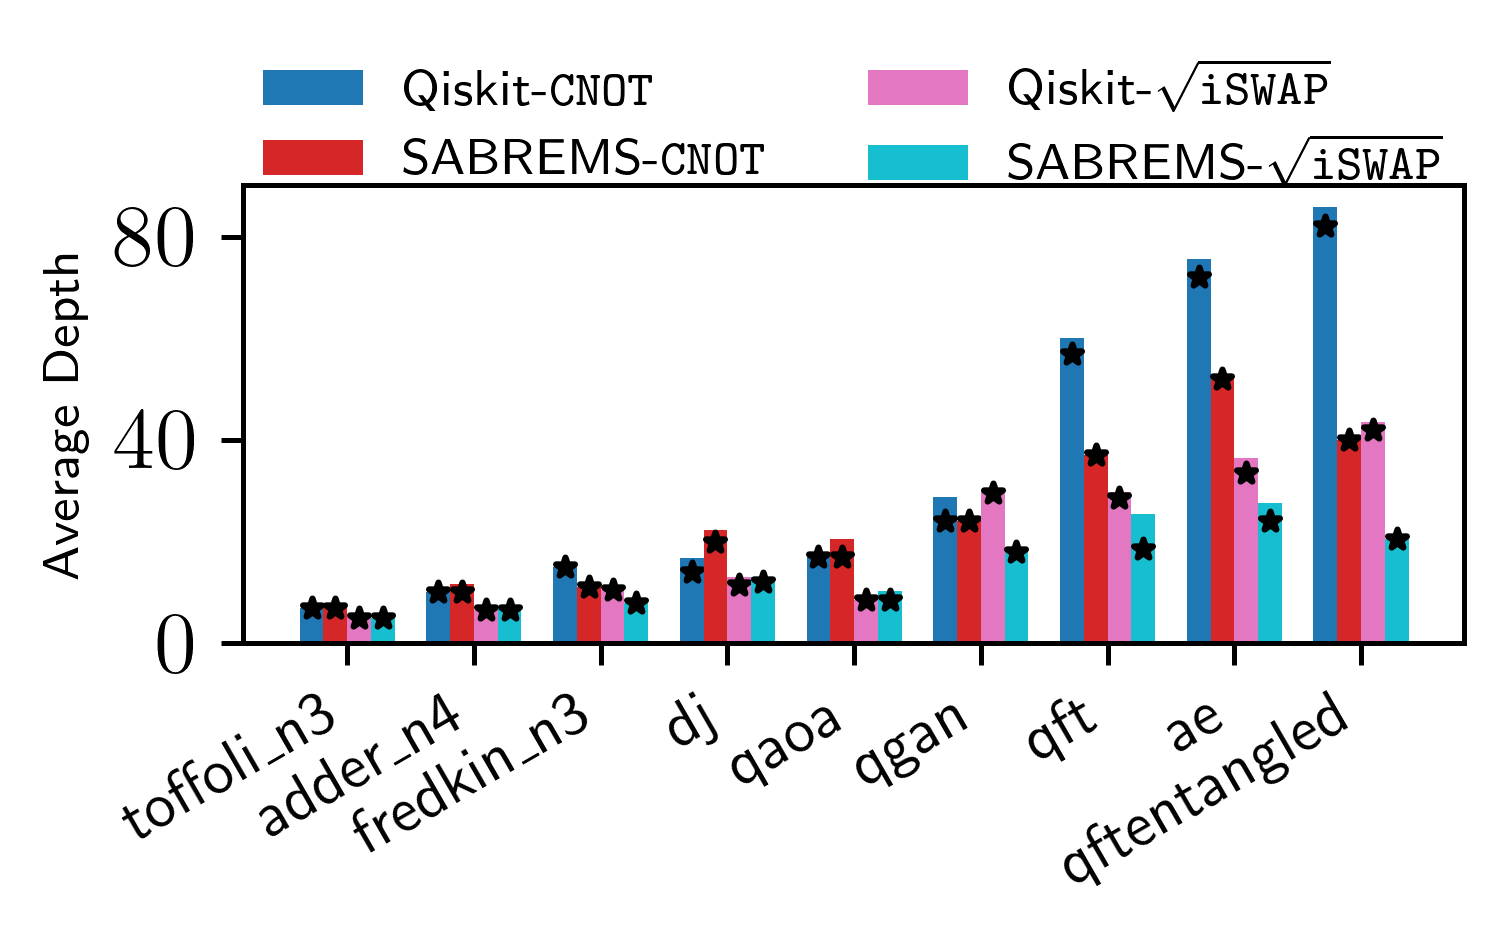

In [17]:
from transpile_benchy.render import plot_benchmark

plot_benchmark(benchmark, legend_show=1)

In [13]:
# from the literature
# toffoli
# fredkin
# EC codes
# Controlled phase
# QAOA
# Controlled phsae
# full entanling
# entanglemnt purification

# linaer, 2d, heavy-hex

# grover
# vqe
# bv
# qft
# qpe
# adder
# multipler
# sqn
# rd84
# co14
# sym9
# hub18
# shor26
# qaoa12
# tfim64
# tfxy64
# toffoli
# fredkin
# adder
# qec_sm
# qec_en
# variational
# hs4
# shor
# pea
# error_correctiond3
# simons
# qaoa
# hhl
# dnn
# qpe
# ising

In [14]:
# benchmarks from NASSC
# from Qiskit, QASMBench, RevLib
# grover_n4
# grover_n6
# grover_n8
# vqe_n8
# vqe_n12
# bv_n19
# qft_n15
# qft_20
# qpe_n9
# adder_n10
# multiplier_n25
# sqn_n258 (?)
# rd84_n253
# co14_n215
# sym9_n193

In [15]:
# benchmarks from PAS+PAM
# from qiskit, supermarq (qaoa)
# adder63
# mul60
# qft5
# qft64
# grover5
# hub18
# shor26
# qaoa12
# tfim64
# tfxy64